## 1. Data selection, reasons, and problem definition

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.float_format = '{:.1f}'.format
#https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes

percent = 0.1 #샘플 비율 지정

df_audi = pd.read_csv("audi.csv")
df_audi = df_audi.sample(round(len(df_audi)*percent))
df_bmw = pd.read_csv("audi.csv")
df_bmw = df_bmw.sample(round(len(df_bmw)*percent))
df_cclass = pd.read_csv("cclass.csv")
df_cclass = df_cclass.sample(round(len(df_cclass)*percent))
df_focus = pd.read_csv("focus.csv")
df_focus = df_focus.sample(round(len(df_focus)*percent))
df_ford = pd.read_csv("ford.csv")
df_ford = df_ford.sample(round(len(df_ford)*percent))
df_hyundai = pd.read_csv("hyundai.csv")
df_hyundai = df_hyundai.sample(round(len(df_hyundai)*percent))
df_hyundai = df_hyundai.rename(columns={"tax(£)":"tax"}) #칼럼명 변경

df_merc = pd.read_csv("merc.csv")
df_merc = df_merc.sample(round(len(df_merc)*percent))
df_skoda = pd.read_csv("skoda.csv")
df_skoda = df_skoda.sample(round(len(df_skoda)*percent))
df_toyota = pd.read_csv("toyota.csv")
df_toyota = df_toyota.sample(round(len(df_toyota)*percent))
df_vauxhall = pd.read_csv("vauxhall.csv")
df_vauxhall = df_vauxhall.sample(round(len(df_vauxhall)*percent))
df_vw = pd.read_csv("vw.csv")
df_vw = df_vw.sample(round(len(df_vw)*percent))

#데이터 하나로 합치기
df_list = [df_audi, df_bmw, df_cclass, df_focus, df_ford, df_hyundai, df_merc, df_skoda, df_toyota, df_vauxhall, df_vw]
df = pd.concat(df_list, ignore_index=True)

print(df.shape)
df.sample(10)

(10843, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10772,T-Roc,2019,21495,Manual,100,Petrol,145.0,42.2,1.5
5879,CLS Class,2018,23995,Semi-Auto,24315,Diesel,145.0,57.7,2.1
5907,E Class,2020,44500,Automatic,3365,Diesel,145.0,47.1,2.9
1504,A1,2017,14990,Manual,20000,Petrol,145.0,58.9,1.4
9449,Sharan,2019,27980,Semi-Auto,3175,Diesel,145.0,41.5,2.0
8019,Insignia,2016,8695,Manual,39460,Petrol,125.0,50.4,1.4
4631,Focus,2018,18500,Manual,16226,Petrol,145.0,41.5,2.0
7637,Aygo,2018,9870,Semi-Auto,4110,Petrol,145.0,67.3,1.0
8283,Astra,2017,11386,Manual,6965,Petrol,20.0,64.2,1.0
5831,C Class,2017,19700,Automatic,29516,Diesel,125.0,58.9,2.1


In [37]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
dtype: object

In [38]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10843.0,10843.0,10843.0,9908.0,9908.0,10843.0
mean,2017.1,16864.7,22985.3,119.6,54.7,1.6
std,2.1,9872.8,20890.6,63.5,13.2,0.5
min,1970.0,590.0,1.0,0.0,2.8,0.0
25%,2016.0,10193.0,7520.5,125.0,46.3,1.2
50%,2017.0,14577.0,17353.0,145.0,54.3,1.5
75%,2019.0,20690.5,32189.0,145.0,62.8,2.0
max,2020.0,137995.0,241565.0,570.0,235.4,6.2


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10843 entries, 0 to 10842
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10843 non-null  object 
 1   year          10843 non-null  int64  
 2   price         10843 non-null  int64  
 3   transmission  10843 non-null  object 
 4   mileage       10843 non-null  int64  
 5   fuelType      10843 non-null  object 
 6   tax           9908 non-null   float64
 7   mpg           9908 non-null   float64
 8   engineSize    10843 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 762.5+ KB


In [40]:
#delete column"tax"
df = df.drop(["tax"], axis = 1)

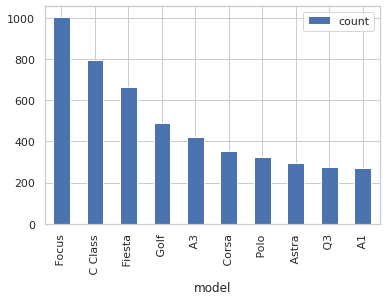

          count
model          
 Focus     1006
 C Class    795
 Fiesta     662
 Golf       487
 A3         422
 Corsa      353
 Polo       324
 Astra      293
 Q3         277
 A1         269


Index([' Focus', ' C Class', ' Fiesta', ' Golf', ' A3', ' Corsa', ' Polo',
       ' Astra', ' Q3', ' A1'],
      dtype='object', name='model')

In [41]:
#Check Trend: top10 sold out models
import matplotlib.pyplot as plt

models = pd.DataFrame(df.groupby("model")["model"].count())
models.columns = ["count"]
models.sort_values(by=["count"], inplace=True, ascending=False)
models = models.head(10)
models.plot.bar()
plt.show()
print(models)
models.index

          count  avg_price
model                     
 Focus     1006    13483.7
 C Class    795    23715.4
 Fiesta     662    10198.9
 Golf       487    16269.2
 A3         422    17332.0
 Corsa      353     8524.9
 Polo       324    11546.7
 Astra      293    10387.0
 Q3         277    22707.1
 A1         269    14395.6
14856.065641924544


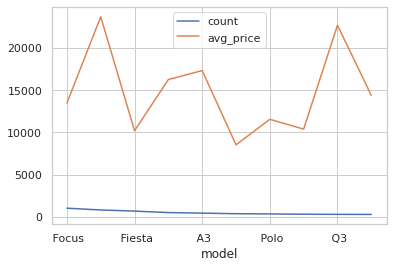

In [42]:
#top10 best selling cars avg price
models_avg_price = df.groupby("model")["price"].mean()
models_avg_price[[' Focus', ' C Class', ' Fiesta', ' Golf', ' A3', ' Corsa', ' Polo',
       ' Q3', ' Astra', ' A4']]
models['avg_price'] = models_avg_price
models.plot.line()
print(models)
print(models["avg_price"].mean())

In [43]:
#top10 best selling cars avg year
models_avg_year = df.groupby("model")["year"].mean()
models_avg_year[[' Focus', ' C Class', ' Fiesta', ' Golf', ' A3', ' Corsa', ' Polo',
       ' Q3', ' Astra', ' A4']]
models['avg_year'] = models_avg_year
print(models)
print(models["avg_year"].mean())

          count  avg_price  avg_year
model                               
 Focus     1006    13483.7    2017.0
 C Class    795    23715.4    2017.4
 Fiesta     662    10198.9    2016.8
 Golf       487    16269.2    2017.1
 A3         422    17332.0    2016.8
 Corsa      353     8524.9    2016.9
 Polo       324    11546.7    2017.0
 Astra      293    10387.0    2016.9
 Q3         277    22707.1    2017.3
 A1         269    14395.6    2016.7
2016.9748993840772


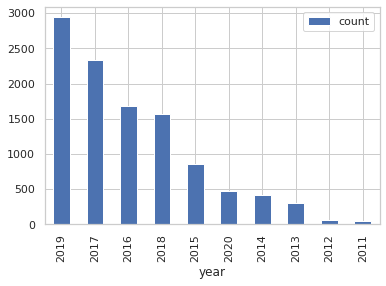

      count
year       
2019   2942
2017   2334
2016   1684
2018   1570
2015    856
2020    472
2014    425
2013    303
2012     69
2011     48


In [44]:
#Check Trend: top10 sold out years

years = pd.DataFrame(df.groupby("year")["year"].count())
years.columns = ["count"]
years.sort_values(by=["count"], inplace=True, ascending=False)
years = years.head(10)
years.plot.bar()
plt.show()
print(years)

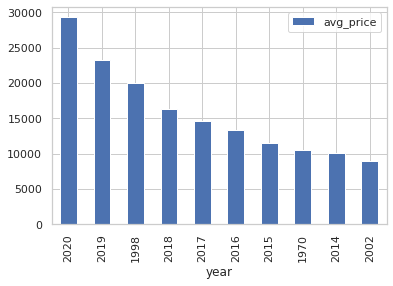

      avg_price
year           
2020    29311.5
2019    23251.9
1998    19990.0
2018    16377.0
2017    14650.8
2016    13389.2
2015    11459.8
1970    10495.0
2014    10087.0
2002     8995.0


In [45]:
#Check Trend: top10 years average price

years_price = pd.DataFrame(df.groupby("year")["price"].mean())
years_price.columns = ["avg_price"]
years_price.sort_values(by=["avg_price"], inplace=True, ascending=False)
years_price = years_price.head(10)
years_price.plot.bar()
plt.show()
print(years_price)

In [46]:
#Check how many 1970 & 1998 cars were sold

condition = (df["year"] == 1970) | (df["year"] == 1998)
df[condition]

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
6446,S Class,1998,19990,Automatic,43534,Petrol,23.3,6.0
8489,Zafira,1970,10495,Manual,37357,Petrol,42.2,1.4


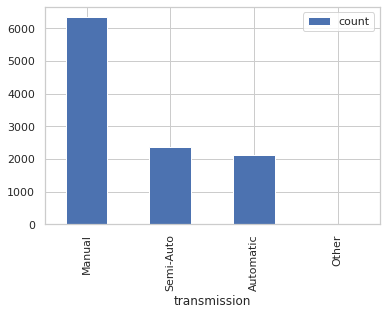

              count
transmission       
Manual         6342
Semi-Auto      2366
Automatic      2133
Other             2


In [47]:
#Check transmissions
transmission = pd.DataFrame(df.groupby(["transmission"])["transmission"].count())
transmission.columns = ["count"]
transmission.sort_values(by=["count"], inplace=True, ascending=False)
transmission.plot.bar()
plt.show()
print(transmission)

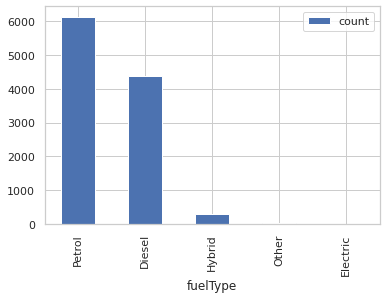

      avg_price
year           
2020    29311.5
2019    23251.9
1998    19990.0
2018    16377.0
2017    14650.8
2016    13389.2
2015    11459.8
1970    10495.0
2014    10087.0
2002     8995.0


In [48]:
#Check fuelType

fuelType = pd.DataFrame(df.groupby("fuelType")["fuelType"].count())
fuelType.columns = ["count"]
fuelType.sort_values(by=["count"], inplace=True, ascending=False)
fuelType.plot.bar()
plt.show()
print(years_price)

In [49]:
#Now we can see
#Years: 15-19 Popular
#Model: Focus / C Class / Fiesta / Golf / A3      
#Transmission: manual
#feul type: Petrol / diessel


## 2. Data preprocessing, EDA, and visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


19

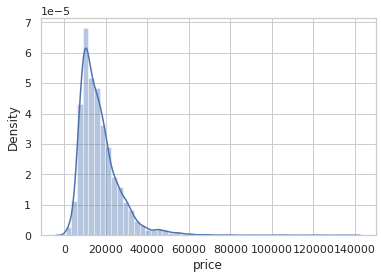

In [50]:
#Check "price" Outliers
sns.distplot(df['price'], kde=True, rug=False)
condition = (df["price"] >75000)
df[condition]["price"].count()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
8489,Zafira,1970,10495,Manual,37357,Petrol,42.2,1.4


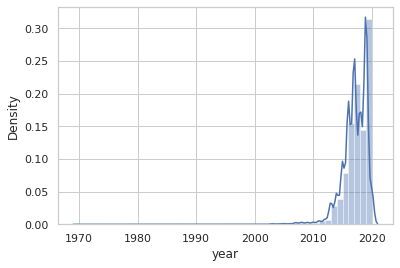

In [51]:
#Check "year" Outliers
sns.distplot(df['year'], kde=True, rug=False)
condition = (df["year"] >2020) | (df["year"] <1990)
df[condition]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3

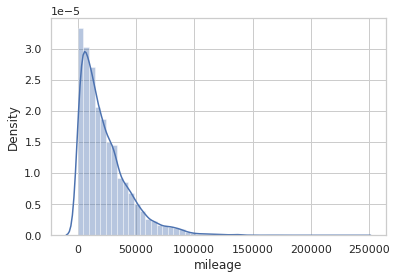

In [52]:
#Check "mileage" Outliers
sns.distplot(df['mileage'], kde=True, rug=False)
condition = (df["mileage"] >150000)
df[condition]["model"].count()

In [53]:
#Delete Outliers
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) &
        (df['mileage'] >= np.percentile(df['mileage'], 0.5)) & 
        (df['mileage'] <= np.percentile(df['mileage'], 99.5)) &
        (df['year'] >= np.percentile(df['year'], 0.5)) & 
        (df['year'] <= np.percentile(df['year'], 99.5))]

In [54]:
#fill null values with average of mpg
df = df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


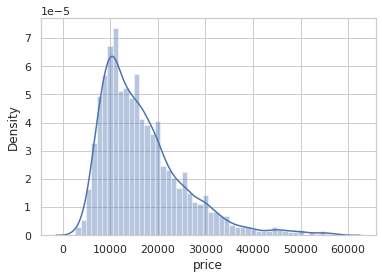

In [55]:
sns.distplot(df['price'], kde=True, rug=False)

22331.61794799587


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


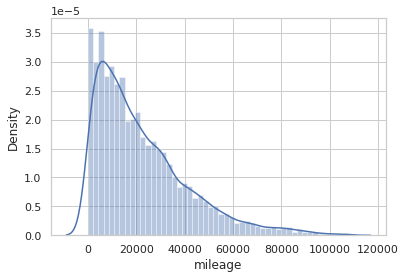

In [56]:
print(df['mileage'].mean())
sns.distplot(df['mileage'], kde=True, rug=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


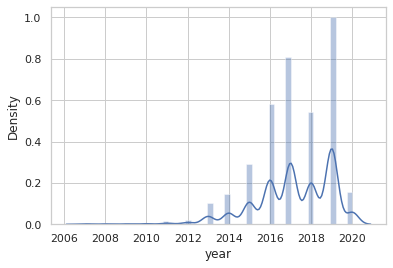

In [57]:
sns.distplot(df['year'], kde=True, rug=False)

In [58]:
# sns.distplot(df[(df['year']>2015)]['mileage'], kde=True, rug=False)

In [59]:
# sns.distplot(df[(df['year']>2009)&(df['year']<2015)]['mileage'], kde=True, rug=False)

In [60]:
# sns.distplot(df[(df['price']<=16500)]['mileage'], kde=True, rug=True)

In [61]:
# sns.distplot(df[(df['price']>16500)]['mileage'], kde=True, rug=True)

In [62]:
# sns.distplot(df[(df['price']>16500)&(df['mileage']<10000)]['year'], kde=True, rug=True)

In [63]:
# sns.distplot(df[(df['price']<=16500)]['year'], kde=True, rug=True)

mean:  16676.0379235896
median:  14650.0


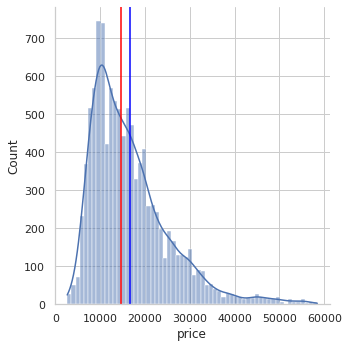

In [64]:
#베이스라인 모델 만들기
y_train = df["price"]

## SalePrice의 확률밀도함수를 그려보겠습니다
sns.displot(df['price'], kde=True)

## 평균과, 중간값으로 수직선을 그려보겠습니다.
plt.axvline(df['price'].mean(), color='blue')
plt.axvline(df['price'].median(), color='red');
print("mean: ", df['price'].mean())
print("median: ", df['price'].median())

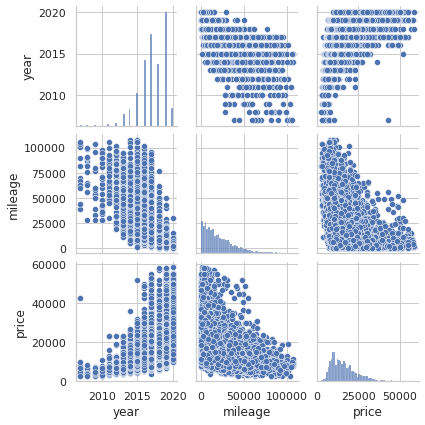

In [65]:
sns.set(style='whitegrid', context='notebook')
cols = ['year', 'mileage','price']
sns.pairplot(df[cols], height=2);

## 3. Modeling and model analysis

In [67]:
## train set, validation set, test set
from sklearn.model_selection import train_test_split

X = df.drop(columns="price")
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=None)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)

print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (5965, 7)
y_train shape:  (5965,)
X_val shape:  (2557, 7)
y_val shape:  (2557,)
X_test shape:  (2131, 7)
y_test shape:  (2131,)


#### 3-0. Baseline Model

In [75]:
# Get baseline model error table
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

price_mean = y_train.mean()
y_pred_baseline = [price_mean] * len(y_val)

mse = mean_squared_error(y_val, y_pred_baseline)
mae = mean_absolute_error(y_val, y_pred_baseline)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_baseline)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,72850631.0
1,MAE,6592.0
2,RMSE,8535.3
3,R2,-0.0


#### 3-1. Multiple Linear Regression

In [73]:
# Make baseline model
from sklearn.linear_model import LinearRegression

multiple_linear_model = LinearRegression()

# Select features
features = ["year", "mileage"]

X_train_mlinear = X_train[features]
X_val_mlinear = X_val[features]

# fit into multiple_linear_model
multiple_linear_model.fit(X_train_mlinear, y_train)

# validation set
y_pred_val_linear = multiple_linear_model.predict(X_val_mlinear)

# 1. multiple linear regression error table
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_val, y_pred_val_linear)
mae = mean_absolute_error(y_val, y_pred_val_linear)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val_linear)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,52546218.9
1,MAE,5524.7
2,RMSE,7248.9
3,R2,0.3


In [70]:
# features를 몇 개 선택하는 것이 좋은지 알아 봅시다.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.feature_selection import f_regression, SelectKBest

training = []
testing = []
ks = range(1, len(X_train.columns)+1)

# 1 부터 특성 수 만큼 사용한 모델을 만들어서 MAE 값을 비교 합니다.
for k in range(1, len(X_train.columns)+ 1):
    print(f'{k} features')
    
    selector = SelectKBest(score_func=f_regression, k=k)
    
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    
    all_names = X_train.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
    print('Selected names: ', selected_names)

    
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)
    mae = mean_absolute_error(y_train, y_pred)
    training.append(mae)
    
    y_pred = model.predict(X_test_selected)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    testing.append(mae)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2} \n')

plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label='Testing Score', color='g')
plt.ylabel("MAE ($)")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.show()

1 features


ValueError: ignored